# Support Vector Machines

A **Support Vector Machine** separates classes using linear separability by maximizing the margin between classes. The linear separation is a hyperplane, referred to as the **decision boundary** and margins are placed on **support vectors**: points that are closest to points of another class ($Z$ space).

A **kernel trick** can be used to improve separation of data. Where the dataset vector matrix is projected into a higher dimensional space without having to map 

If data is **linearly separable** (by a hyper-plane), then a **wide-margin classifier** (LinearSVC) can be utilized. When data is not linear separable, it should be projected to a **higher dimension** $\phi: X \to Z$ using a kernel trick, which results in a **soft-margin classifier**.

A Support Vector Classifier works through an optimization problem:

$$
    \begin{cases}
    \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip} > 0 & \text{ if } y_i = 1\\
    \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip} < 0 & \text{ if } y_i = 0
    \end{cases}
$$

The solution:

$$
    \underset{\beta_0,\beta_1,\ldots,\beta_p,\eta_1,\ldots,\eta_n,M}{\max M}\\
    \text{subject to } \sum_{j=1}^{p}\beta_j^2=1,\\
    y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip}) \geq M(1 - \eta_i)\\
    \eta_i \geq 0, \sum_{i=1}^{n}\eta_i \leq C
$$

Where $C$ is a non-negative tuning parameter and $M$ is the width of the margin; it seeks to make this as large as possible. If $\eta_i = 0$ then we're on the right side of the margin. If $\eta_i > 0$ then we're on the wrong side and violating the margin.

## Pros
- Top performing ML algorithms until advent of deep learning.
- Less affected by outliers (because the separation boundary only depends on the support vectors. Produces robust classifiers.
- Useful when more features than samples.
- Can be used for both classification and regression (scikit-learn's `SVR`).

## Cons
- Requires a lot of compute resources as Linear SVC is in $O(m \times n)$ and SVC with kernels is in $O(n^2)$ or $O(n^3)$ time complexity.
- Not great for **multi-class** classification, **one-vs-all**, **one-vs-all**.
- Can be difficult to interpret and diagnose.

## References
1. Hands-On Machine Learning, Chapter 5: Support Vector Machines
1. Python Data Science Handbook, Chapter 5 - In Depth: Support Vector Machines
1. Machine Learning Pocket Reference, Chapter 10 - Support Vector Machines
1. An Introduction to Statistical Learning, Chapter 9 - Support Vector Machines
1. SciKit-Learn - Support Vector Machines: [https://scikit-learn.org/stable/modules/svm.html](https://scikit-learn.org/stable/modules/svm.html)
1. Support Vector Machine — Introduction to Machine Learning Algorithms: [https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

## Videos

1. StatQuest - Support Vector Machines Playlist [https://www.youtube.com/playlist?list=PLblh5JKOoLUL3IJ4-yor0HzkqDQ3JmJkc](https://www.youtube.com/playlist?list=PLblh5JKOoLUL3IJ4-yor0HzkqDQ3JmJkc)

# Hyperparameters

## $C$: Penalty Parameter

- **hard-margin classifiers** expect perfect separability, but we can add a **slack variable** and get a **soft-margin classifier**.
- When the data is not linearly separable, we can adjust the trade-off between margin width and the classification error using the $C$ hyperparameter.
- $C$ is the *budget* of $n$ observations that are allowed to be on the wrong side of the margin or decision boundary.
    - Smaller $C$: narrow margins that are rarely violated. The classifier has low bias but high variance.
    - Larger $C$: large margins that are frequently violated. The classifier has the trade-off of high bias for low variance. Many observations become support vectors.

## $d$: Polynomial Kernel

- Degree of polynomialzation for non-linear decision boundary.
    - Lower $d$: less curvature on decision boundary. Less accuracy.
    - Higher $d$: more curvature. Improved accuracy, more potential overfitting.

## $\gamma$: Radial Basis Function Kernel

- Radial decision boundary.
    - Lower $\gamma$: the ‘curve’ of the decision boundary is very low and thus the decision region is very broad.
    - Higher $\gamma$: the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points. Improved accuracy, but more potential overfitting.

# Kernels

Kernels improve separation of data by projecting data into a higher dimensional space, where a non-linear hyperplane can be fitted. This process makes use of a **kernel trick** which does not require the full computation of observations.



## Kernel Trick

The inner product of two observations is given by: $\langle x_n,x_m \rangle = \sum_{j=1}^{p}x_{nj}x_mj$

The linear support vector can be represented as: $f(x) = \beta_0 + \sum_{i=1}^{n}\alpha_i \langle x,x_n \rangle$ Where there are $n$ parameters $\alpha_i$, $i = 1, \ldots, n$, one per training observation.

We can replace this with the linear generalization: $K(x_n, x_n) = x_n^Tx_m$

## Types of Kernels

- **Linear**: $K(x_n, x_m) = x_n^Tx_m$; the standard dot product.
- **Polynomial**: $K(x_n, x_m) = (\gamma x_n^Tx_m + r)^d$ where $\gamma > 0$.
- **Radial Bias Functiuon** or **Gaussian**: $K(x_n, x_m) = \exp(-\gamma||x_n - x_m||^2)$ where $\gamma > 0$ which corresponds to an infinite dimensional $Z$ space if we look at its Taylor Series expansion.

# Basic Linear SVC with Scikit-Learn

Linear SVC is also known as a **Maximal Margin Classifier**.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.contrib.classifier import DecisionViz

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

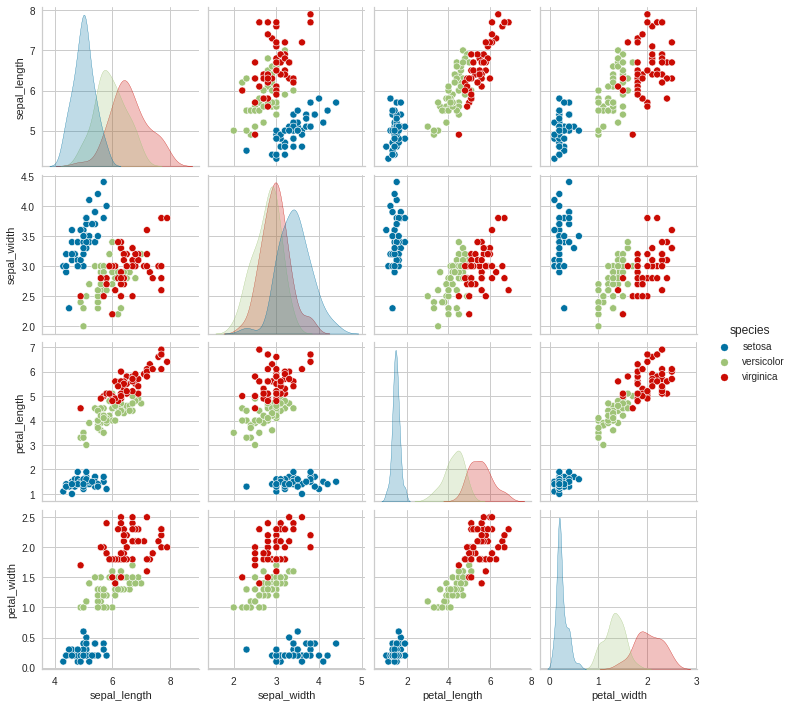

In [5]:
sns.pairplot(data=iris, hue='species')
plt.show()

In [6]:
# Pruned the dataset down to setosa and versicolor targets
iris = iris[iris['species'] != 'virginica']

In [7]:
iris.shape

(100, 5)

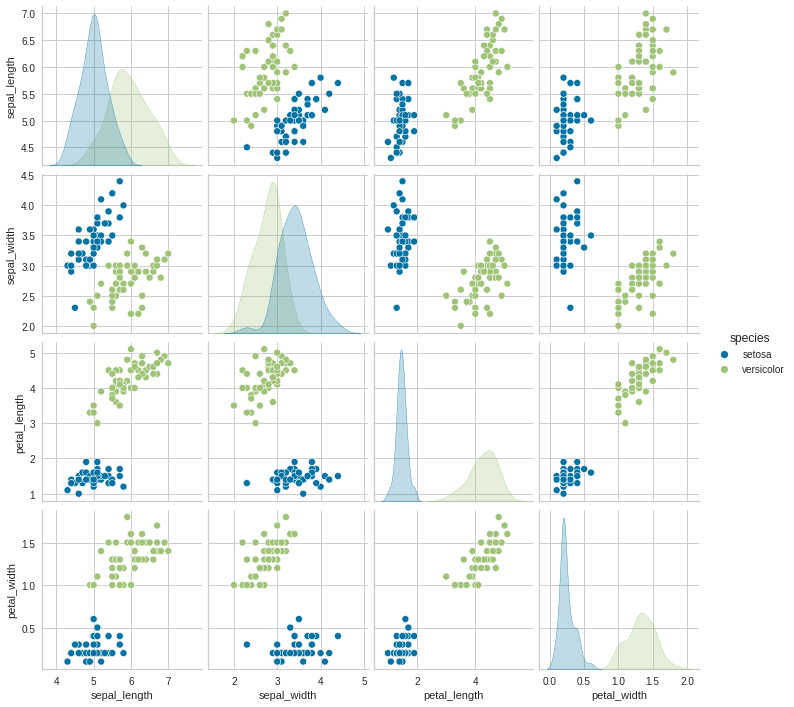

In [8]:
sns.pairplot(data=iris, hue='species')
plt.show()

In [9]:
# Reduce the dataset to two features
X = iris.drop(['species', 'petal_length', 'petal_width'], axis=1)
y = iris['species']

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [11]:
lin_svc = SVC(kernel='linear')
lin_svc.fit(X, y)

SVC(kernel='linear')

In [12]:
lin_svc.decision_function(X)

array([-2.21086001, -1.11900494, -2.40334895, -2.36660693, -2.85303201,
       -2.66054308, -3.38497796, -2.17411799, -2.29312289, -1.45846195,
       -1.98162905, -2.77954798, -1.42171993, -2.93529489, -1.78914012,
       -3.44968316, -2.66054308, -2.21086001, -1.41294109, -3.22923104,
       -0.96325802, -2.88977403, -4.06389198, -1.53194599, -2.77954798,
       -0.81628994, -2.17411799, -1.90814502, -1.568688  , -2.40334895,
       -1.76117694, -0.96325802, -3.94488709, -3.37619912, -1.45846195,
       -1.49520397, -1.00000004, -3.15574701, -2.6325799 , -1.871403  ,
       -2.513575  ,  0.04633417, -3.31149392, -2.513575  , -3.22923104,
       -1.42171993, -3.22923104, -2.70606394, -2.28434405, -1.83466098,
        4.55909589,  2.74280593,  4.59583791,  3.0734841 ,  4.40334897,
        1.98162903,  2.10063393,  0.91773713,  4.36660696,  0.80751108,
        2.57828017,  1.90814499,  4.92651608,  2.85303199,  1.33945703,
        3.99040792,  1.00000001,  2.62380104,  5.53194606,  2.69

In [13]:
lin_svc.coef_

array([[ 1.93278011, -1.61696669]])

In [14]:
lin_svc.intercept_

array([0.27343523])

In [15]:
lin_svc.classes_

array([0, 1])

In [16]:
y_pred = lin_svc.predict(X)

Target class prediction probabilities when `probability=True`

In [17]:
confusion_matrix(y, y_pred, labels=lin_svc.classes_)

array([[49,  1],
       [ 0, 50]])

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/home/jonathan/anaconda3/envs/datascience/lib/python3.8/site-packages/yellowbrick/contrib/classifier/boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


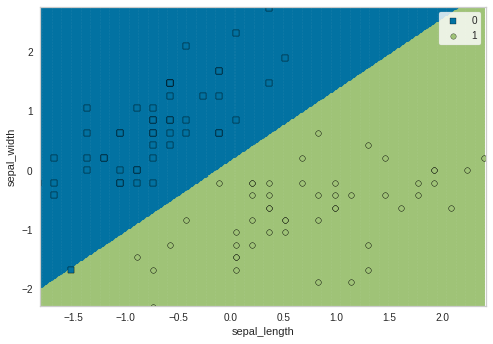

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

In [19]:
viz = DecisionViz(lin_svc, title='Linear SVC', x='sepal_length', y='sepal_width')
viz.fit(X, y)
viz.draw(X, y)
viz.show()

# SVC with Polynomial Kernel

In [20]:
poly_svc = SVC(kernel='poly', degree=3)
poly_svc.fit(X, y)

SVC(kernel='poly')

In [21]:
poly_svc.classes_

array([0, 1])

In [22]:
poly_svc.decision_function(X)

array([ -1.09699844,  -0.59531723,  -1.84513951,  -2.4018189 ,
        -2.21215858,  -4.15707382,  -3.57463642,  -0.9445742 ,
        -4.12439345,  -0.64953294,  -1.7723772 ,  -1.93405532,
        -0.9993881 ,  -5.6207283 ,  -4.22316545, -14.85992835,
        -4.15707382,  -1.09699844,  -2.03622625,  -4.00273461,
        -0.21044685,  -2.73306243,  -5.44238308,  -0.3587772 ,
        -1.93405532,  -0.31298651,  -0.9445742 ,  -0.83434297,
        -0.4290768 ,  -1.84513951,  -1.07764491,  -0.21044685,
        -9.36202199, -10.00167274,  -0.64953294,  -0.43412928,
        -0.43146258,  -2.77245049,  -4.2758637 ,  -0.63864731,
        -1.46073413,  -1.00030565,  -4.83535159,  -1.46073413,
        -4.00273461,  -0.9993881 ,  -4.00273461,  -2.63689062,
        -2.01897695,  -0.61769914,  12.74669552,   2.83405745,
        10.80085126,   4.04877987,   5.5080912 ,   0.43497646,
         1.93285257,   0.99969414,   6.24926269,   0.28768625,
         7.32750049,   0.40270645,   9.05609077,   1.33

In [23]:
decision_function = poly_svc.decision_function(X)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]

In [24]:
decision_function

array([ -1.09699844,  -0.59531723,  -1.84513951,  -2.4018189 ,
        -2.21215858,  -4.15707382,  -3.57463642,  -0.9445742 ,
        -4.12439345,  -0.64953294,  -1.7723772 ,  -1.93405532,
        -0.9993881 ,  -5.6207283 ,  -4.22316545, -14.85992835,
        -4.15707382,  -1.09699844,  -2.03622625,  -4.00273461,
        -0.21044685,  -2.73306243,  -5.44238308,  -0.3587772 ,
        -1.93405532,  -0.31298651,  -0.9445742 ,  -0.83434297,
        -0.4290768 ,  -1.84513951,  -1.07764491,  -0.21044685,
        -9.36202199, -10.00167274,  -0.64953294,  -0.43412928,
        -0.43146258,  -2.77245049,  -4.2758637 ,  -0.63864731,
        -1.46073413,  -1.00030565,  -4.83535159,  -1.46073413,
        -4.00273461,  -0.9993881 ,  -4.00273461,  -2.63689062,
        -2.01897695,  -0.61769914,  12.74669552,   2.83405745,
        10.80085126,   4.04877987,   5.5080912 ,   0.43497646,
         1.93285257,   0.99969414,   6.24926269,   0.28768625,
         7.32750049,   0.40270645,   9.05609077,   1.33

In [25]:
y_pred = poly_svc.predict(X)

Target class prediction probabilities when `probability=True`

In [26]:
confusion_matrix(y, y_pred, labels=poly_svc.classes_)

array([[50,  0],
       [ 0, 50]])

In [27]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/home/jonathan/anaconda3/envs/datascience/lib/python3.8/site-packages/yellowbrick/contrib/classifier/boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


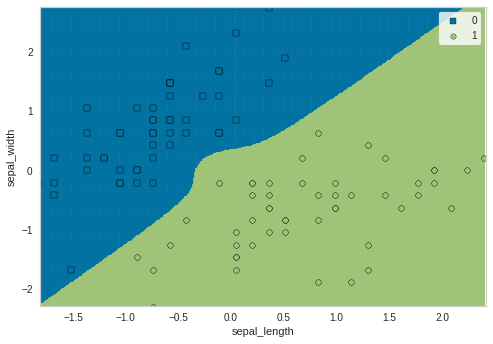

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

In [28]:
viz = DecisionViz(poly_svc, title='Polynomial SVC', x='sepal_length', y='sepal_width')
viz.fit(X, y)
viz.draw(X, y)
viz.show()

# SVC with RBF Kernel

In [29]:
rbf_svc = SVC(kernel='rbf', gamma=5)
rbf_svc.fit(X, y)

SVC(gamma=5)

In [30]:
rbf_svc.classes_

array([0, 1])

In [31]:
rbf_svc.decision_function(X)

array([-1.00021013, -1.08854248, -0.99995096, -1.02283694, -0.99992499,
       -0.99958517, -0.99956155, -1.01293458, -1.00010781, -1.13629322,
       -0.99993668, -0.99977758, -0.99989774, -1.00006346, -0.99999013,
       -1.00009396, -0.99958517, -1.00021013, -0.99953115, -0.99992498,
       -0.99994352, -1.02418359, -1.00013698, -0.99999361, -0.99977758,
       -0.98268831, -1.01293458, -1.024315  , -1.0479121 , -0.99995096,
       -1.06420022, -0.99994352, -0.99967864, -0.99993086, -1.13629322,
       -1.02140077, -1.00039194, -1.00002275, -1.12840599, -1.03674741,
       -1.00026776, -0.80116193, -1.0000727 , -1.00026776, -0.99992498,
       -0.99989774, -0.99992498, -1.03783859, -1.00748435, -1.01724538,
        1.00005695,  0.9999068 ,  1.01666163,  0.99987367,  0.99990481,
        0.99959966,  0.99983931,  1.00000754,  1.06190113,  1.00011487,
        0.99980839,  0.99993419,  1.0000422 ,  1.01288702,  1.07131388,
        0.99993735,  1.06408773,  1.0404034 ,  0.99971142,  0.99

In [32]:
decision_function = rbf_svc.decision_function(X)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]

In [33]:
decision_function

array([-1.00021013, -1.08854248, -0.99995096, -1.02283694, -0.99992499,
       -0.99958517, -0.99956155, -1.01293458, -1.00010781, -1.13629322,
       -0.99993668, -0.99977758, -0.99989774, -1.00006346, -0.99999013,
       -1.00009396, -0.99958517, -1.00021013, -0.99953115, -0.99992498,
       -0.99994352, -1.02418359, -1.00013698, -0.99999361, -0.99977758,
       -0.98268831, -1.01293458, -1.024315  , -1.0479121 , -0.99995096,
       -1.06420022, -0.99994352, -0.99967864, -0.99993086, -1.13629322,
       -1.02140077, -1.00039194, -1.00002275, -1.12840599, -1.03674741,
       -1.00026776, -0.80116193, -1.0000727 , -1.00026776, -0.99992498,
       -0.99989774, -0.99992498, -1.03783859, -1.00748435, -1.01724538,
        1.00005695,  0.9999068 ,  1.01666163,  0.99987367,  0.99990481,
        0.99959966,  0.99983931,  1.00000754,  1.06190113,  1.00011487,
        0.99980839,  0.99993419,  1.0000422 ,  1.01288702,  1.07131388,
        0.99993735,  1.06408773,  1.0404034 ,  0.99971142,  0.99

In [34]:
y_pred = rbf_svc.predict(X)

Target class prediction probabilities when `probability=True`

In [35]:
confusion_matrix(y, y_pred, labels=rbf_svc.classes_)

array([[50,  0],
       [ 0, 50]])

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/home/jonathan/anaconda3/envs/datascience/lib/python3.8/site-packages/yellowbrick/contrib/classifier/boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


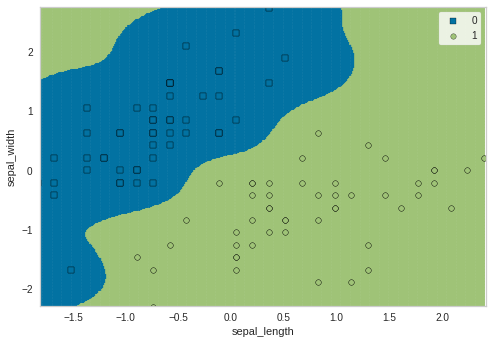

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

In [37]:
viz = DecisionViz(rbf_svc, title='RBF SVC', x='sepal_length', y='sepal_width')
viz.fit(X, y)
viz.draw(X, y)
viz.show()